In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
data.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

In [5]:
data['Release Clause'] = data['Release Clause'].str.strip('€')

In [6]:
data['Release Clause'] = data['Release Clause'].str.strip('M')

In [7]:
data['Release Clause'] =data['Release Clause'].str.strip('K')

In [8]:
data['Release Clause'] = data['Release Clause'].astype('float')

In [9]:
data['Release Clause'].isnull().sum()

1564

In [10]:
test_data = data[data['Release Clause'].isnull()]

In [11]:
data= data[~(data['Release Clause'].isnull())]

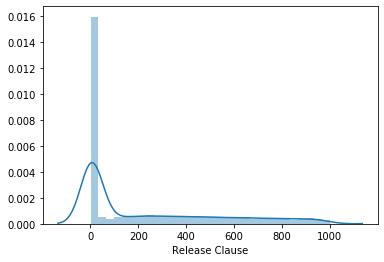

In [12]:
sns.distplot(data['Release Clause'])

In [13]:
data.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause    float64
Length: 89, dtype: object

In [14]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,...,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000
mean,9168.646218,213845.010094,25.226221,66.162771,71.140900,1595.383404,1.114823,2.942919,2.349516,19.657213,...,58.558673,47.328967,47.776302,45.751607,16.747521,16.515712,16.355765,16.503936,16.837409,228.201274
std,5297.151986,30546.285826,4.716588,7.008236,6.151409,275.723076,0.398559,0.659933,0.755855,16.054811,...,11.539260,19.937220,21.681809,21.295201,17.832273,17.033907,16.615668,17.151713,18.090985,299.251866
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4578.500000,199569.500000,21.000000,62.000000,67.000000,1452.000000,1.000000,3.000000,2.000000,8.000000,...,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2.500000
50%,9207.000000,221493.000000,25.000000,66.000000,71.000000,1633.000000,1.000000,3.000000,2.000000,17.000000,...,59.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,19.800000
75%,13801.500000,236802.000000,29.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,431.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,999.000000


In [15]:
data[data['Release Clause'] == 1.0]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3613,3613,161663,S. Viera,35,https://cdn.sofifa.org/players/4/19/161663.png,Uruguay,https://cdn.sofifa.org/flags/60.png,72,72,Junior FC,...,58.0,26.0,9.0,9.0,71.0,70.0,67.0,71.0,74.0,1.0
4508,4508,159157,B. Leal,36,https://cdn.sofifa.org/players/4/19/159157.png,Chile,https://cdn.sofifa.org/flags/55.png,71,71,San Luis de Quillota,...,71.0,63.0,71.0,68.0,13.0,16.0,6.0,11.0,14.0,1.0
5119,5119,230243,Breno Bemposta,34,https://cdn.sofifa.org/players/4/19/230243.png,Brazil,https://cdn.sofifa.org/flags/54.png,70,70,Ceará Sporting Club,...,69.0,74.0,77.0,60.0,14.0,8.0,15.0,8.0,18.0,1.0
5139,5139,230249,Marlinito Dias,34,https://cdn.sofifa.org/players/4/19/230249.png,Brazil,https://cdn.sofifa.org/flags/54.png,70,70,Cruzeiro,...,73.0,70.0,62.0,51.0,11.0,16.0,9.0,11.0,8.0,1.0
5554,5554,153060,J. Insaurralde,33,https://cdn.sofifa.org/players/4/19/153060.png,Argentina,https://cdn.sofifa.org/flags/52.png,70,70,Colo-Colo,...,63.0,68.0,70.0,69.0,11.0,10.0,13.0,6.0,13.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15105,15105,235960,G. Güney,19,https://cdn.sofifa.org/players/4/19/235960.png,Turkey,https://cdn.sofifa.org/flags/48.png,60,77,Galatasaray SK,...,49.0,55.0,59.0,58.0,13.0,12.0,10.0,12.0,7.0,1.0
15156,15156,237518,M. Drawz,19,https://cdn.sofifa.org/players/4/19/237518.png,Poland,https://cdn.sofifa.org/flags/37.png,60,75,Hamburger SV,...,54.0,20.0,19.0,24.0,10.0,14.0,8.0,14.0,10.0,1.0
15241,15241,234472,M. Sorensen,19,https://cdn.sofifa.org/players/4/19/234472.png,Denmark,https://cdn.sofifa.org/flags/13.png,60,75,Brentford,...,59.0,59.0,60.0,55.0,6.0,13.0,12.0,14.0,11.0,1.0
15291,15291,239355,R. Boultam,20,https://cdn.sofifa.org/players/4/19/239355.png,Netherlands,https://cdn.sofifa.org/flags/34.png,60,74,US Cremonese,...,48.0,41.0,51.0,43.0,5.0,5.0,6.0,10.0,8.0,1.0


In [16]:
data = data.drop(['Name','ID','Loaned From','Unnamed: 0','Photo','Flag','Club Logo','Joined'], axis=1)

In [17]:
data.columns

Index(['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Rele

In [18]:
data.shape

(16643, 81)

checking null or missing values

In [19]:
data.isnull().sum()

Age               0
Nationality       0
Overall           0
Potential         0
Club              0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 81, dtype: int64

In [20]:
data.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
3,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
4,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4


In [21]:
test_data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
28,28,198710,J. Rodríguez,26,https://cdn.sofifa.org/players/4/19/198710.png,Colombia,https://cdn.sofifa.org/flags/56.png,88,89,FC Bayern München,...,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,NaN
38,38,167664,G. Higuaín,30,https://cdn.sofifa.org/players/4/19/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,88,88,Milan,...,86.0,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0,NaN
91,91,187961,Paulinho,29,https://cdn.sofifa.org/players/4/19/187961.png,Brazil,https://cdn.sofifa.org/flags/54.png,85,85,Guangzhou Evergrande Taobao FC,...,80.0,75.0,81.0,73.0,16.0,16.0,11.0,6.0,8.0,NaN
166,166,212523,Anderson Talisca,24,https://cdn.sofifa.org/players/4/19/212523.png,Brazil,https://cdn.sofifa.org/flags/54.png,83,90,Guangzhou Evergrande Taobao FC,...,74.0,55.0,62.0,42.0,13.0,11.0,13.0,12.0,10.0,NaN
176,176,207410,M. Kovačić,24,https://cdn.sofifa.org/players/4/19/207410.png,Croatia,https://cdn.sofifa.org/flags/10.png,83,89,Chelsea,...,72.0,69.0,75.0,63.0,9.0,5.0,6.0,7.0,7.0,NaN


In [22]:
test_data.drop(['Unnamed: 0','Photo','Flag','Club Logo'], axis=1)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
28,198710,J. Rodríguez,26,Colombia,88,89,FC Bayern München,€69.5M,€315K,2171,...,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,NaN
38,167664,G. Higuaín,30,Argentina,88,88,Milan,€57M,€245K,1965,...,86.0,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0,NaN
91,187961,Paulinho,29,Brazil,85,85,Guangzhou Evergrande Taobao FC,€37M,€235K,2245,...,80.0,75.0,81.0,73.0,16.0,16.0,11.0,6.0,8.0,NaN
166,212523,Anderson Talisca,24,Brazil,83,90,Guangzhou Evergrande Taobao FC,€36.5M,€18K,2142,...,74.0,55.0,62.0,42.0,13.0,11.0,13.0,12.0,10.0,NaN
176,207410,M. Kovačić,24,Croatia,83,89,Chelsea,€35M,€165K,2115,...,72.0,69.0,75.0,63.0,9.0,5.0,6.0,7.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17979,241341,Zhang Yuan,21,China PR,51,60,Guizhou Hengfeng FC,€60K,€2K,1459,...,43.0,47.0,41.0,46.0,12.0,12.0,10.0,13.0,9.0,NaN
18026,241444,Chen Ji,21,China PR,50,59,Guizhou Hengfeng FC,€50K,€2K,1440,...,38.0,46.0,48.0,51.0,15.0,8.0,10.0,13.0,7.0,NaN
18031,243506,Zhou Xin,20,China PR,50,61,Stabæk Fotball,€40K,€2K,1278,...,32.0,51.0,48.0,48.0,11.0,7.0,9.0,10.0,6.0,NaN
18056,244872,L. Valeau,19,Italy,50,65,Ascoli,€60K,€3K,1450,...,42.0,41.0,54.0,55.0,8.0,11.0,13.0,14.0,14.0,NaN


Let's work on the numerical columns and prepare them for mathematical analysis.

In [23]:
data['Value'].dtypes

dtype('O')

In [24]:
data['Value'] = data['Value'].str.strip('€')

In [25]:
data['Value'] = data['Value'].str.strip('M')

In [26]:
data['Value'] =data['Value'].str.strip('K')

In [27]:
data['Value']= data['Value'].astype('float')

In [28]:
data['Value'].dtypes

dtype('float64')

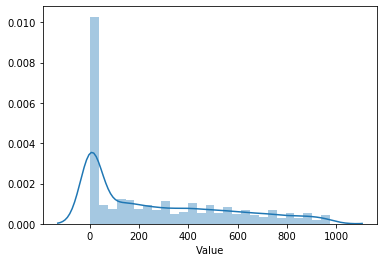

In [29]:
sns.distplot(data['Value'])

In [30]:
data['Wage'] = data['Wage'].str.strip('€')

In [31]:
data['Wage'] = data['Wage'].str.strip('M')

In [32]:
data['Wage'] =data['Wage'].str.strip('K')

In [33]:
data['Wage']= data['Wage'].astype('float')

In [34]:
data['Wage'].dtypes

dtype('float64')

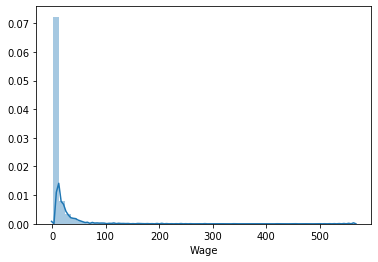

In [35]:
sns.distplot(data['Wage'])

In [36]:
data.columns

Index(['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Rele

In [37]:
data['Contract Valid Until']=data['Contract Valid Until'].astype('int')

In [38]:
data.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,Argentina,94,94,FC Barcelona,110.5,565.0,2202,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,33,Portugal,94,94,Juventus,77.0,405.0,2228,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,26,Brazil,92,93,Paris Saint-Germain,118.5,290.0,2143,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
3,27,Spain,91,93,Manchester United,72.0,260.0,1471,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
4,27,Belgium,91,92,Manchester City,102.0,355.0,2281,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4


In [39]:
data['Weight'] = data['Weight'].str.strip('lbs')

In [40]:
data['Weight'] = data['Weight'].astype('int')

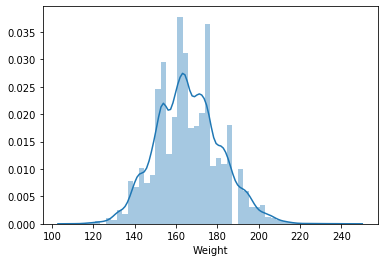

In [41]:
sns.distplot(data['Weight'])

In [42]:
z = data['Height'].str.split("'", expand=True)

In [43]:
z = z.astype('int')

In [44]:
z[0]

0        5
1        6
2        5
3        6
4        5
        ..
18202    5
18203    6
18204    5
18205    5
18206    5
Name: 0, Length: 16643, dtype: int32

In [45]:
data['Height_Feet'] = z[0]
data['Height_inches'] = z[1]

In [46]:
data.columns

Index(['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Rele

In [47]:
data = data.drop('Height', axis=1)

In [48]:
data['Height_cm']= ((data['Height_Feet']*30.48)+(data['Height_inches'] *2.54))

In [49]:
data['Height_cm']

0        170.18
1        187.96
2        175.26
3        193.04
4        180.34
          ...  
18202    175.26
18203    190.50
18204    172.72
18205    177.80
18206    177.80
Name: Height_cm, Length: 16643, dtype: float64

In [50]:
data = data.drop(['Height_Feet','Height_inches'], axis=1)

In [51]:
data.columns

Index(['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Contract Valid Until', 'Weight', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause

checking the correlation between independent variables with dependent variable

In [52]:
data.corr()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Height_cm
Age,1.000000,0.464977,-0.236762,-0.040465,0.148525,0.246140,0.250947,0.065577,0.036189,-0.255510,...,0.145740,0.121925,0.104952,0.099601,0.104141,0.102157,0.114990,0.101470,-0.041166,0.085158
Overall,0.464977,1.000000,0.663346,-0.222161,0.573896,0.610294,0.503630,0.210808,0.415560,-0.228483,...,0.294234,0.261570,0.231717,-0.027520,-0.026789,-0.031208,-0.018313,-0.024903,-0.392288,0.038439
Potential,-0.236762,0.663346,1.000000,-0.230880,0.490633,0.386819,0.386085,0.157624,0.352585,-0.008343,...,0.169212,0.151542,0.137164,-0.052932,-0.053468,-0.057845,-0.051123,-0.052621,-0.385456,-0.012609
Value,-0.040465,-0.222161,-0.230880,1.000000,-0.250025,-0.104577,-0.210882,-0.048130,-0.106677,0.010947,...,-0.018246,-0.014139,-0.010279,-0.037401,-0.039573,-0.036641,-0.038278,-0.035674,0.280187,-0.006374
Wage,0.148525,0.573896,0.490633,-0.250025,1.000000,0.348278,0.677923,0.138816,0.259534,-0.093208,...,0.151515,0.133823,0.118737,-0.024328,-0.023722,-0.026930,-0.023131,-0.024529,-0.214962,0.020191
Special,0.246140,0.610294,0.386819,-0.104577,0.348278,1.000000,0.293690,0.342839,0.765503,-0.142334,...,0.570738,0.548057,0.516489,-0.675615,-0.675076,-0.671365,-0.669122,-0.674614,-0.245869,-0.383340
International Reputation,0.250947,0.503630,0.386085,-0.210882,0.677923,0.293690,1.000000,0.126812,0.209651,-0.081229,...,0.118136,0.095872,0.082258,0.005145,0.004925,0.001154,0.008183,0.004048,-0.167478,0.034526
Weak Foot,0.065577,0.210808,0.157624,-0.048130,0.138816,0.342839,0.126812,1.000000,0.337303,-0.040679,...,0.073399,0.050211,0.034022,-0.231601,-0.233397,-0.229988,-0.230728,-0.233557,-0.076770,-0.175299
Skill Moves,0.036189,0.415560,0.352585,-0.106677,0.259534,0.765503,0.209651,0.337303,1.000000,-0.040529,...,0.251671,0.223665,0.191282,-0.624438,-0.622858,-0.620114,-0.621766,-0.625232,-0.241195,-0.425553
Jersey Number,-0.255510,-0.228483,-0.008343,0.010947,-0.093208,-0.142334,-0.081229,-0.040679,-0.040529,1.000000,...,-0.146094,-0.135547,-0.125809,0.006026,0.002153,0.002218,-0.002102,0.004577,0.049994,-0.041338


In [53]:
print(list(data.dtypes))

[dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('int32'), dtype('int32'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dty

In [54]:
print(list(data.isnull().sum()))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [55]:
data.columns

Index(['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Contract Valid Until', 'Weight', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause

### Building a seperate DataFrame for Goalies, to remove foot work attributes

In [56]:
Goalies = data[data['LS'].isnull()]

Dropping the Goalies data to predict values of only field players

In [57]:
data =  data[~(data['LS'].isnull())]

In [58]:
data.shape

(14743, 81)

In [59]:
print(list(data.isnull().sum()))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Separating Numerical and Categorical Columns

### Categorical Data

In [60]:
data_cat = data.select_dtypes(include = 'object')

In [61]:
data_cat[['Jersey Number','Contract Valid Until']]= data[['Jersey Number','Contract Valid Until']]

In [62]:
data_cat.columns

Index(['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type',
       'Real Face', 'Position', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Jersey Number',
       'Contract Valid Until'],
      dtype='object')

### Numerical Data

In [63]:
data_num  = data.drop(data_cat.columns, axis=1)

In [64]:
data_num.columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'Height_cm'],
      dtype='object')

In [65]:
data_cat.head()

,Nationality,Club,Preferred Foot,Work Rate,Body Type,Real Face,Position,LS,ST,RS,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Jersey Number,Contract Valid Until
0,Argentina,FC Barcelona,Left,Medium/ Medium,Messi,Yes,RF,88+2,88+2,88+2,...,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,10.0,2021
1,Portugal,Juventus,Right,High/ Low,C. Ronaldo,Yes,ST,91+3,91+3,91+3,...,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,7.0,2022
2,Brazil,Paris Saint-Germain,Right,High/ Medium,Neymar,Yes,LW,84+3,84+3,84+3,...,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,10.0,2022
4,Belgium,Manchester City,Right,High/ High,Normal,Yes,RCM,82+3,82+3,82+3,...,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,7.0,2023
5,Belgium,Chelsea,Right,High/ Medium,Normal,Yes,LF,83+3,83+3,83+3,...,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,10.0,2020


In [66]:
data_num.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Weight,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Height_cm
0,31,94,94,110.5,565.0,2202,5.0,4.0,4.0,159,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5,170.18
1,33,94,94,77.0,405.0,2228,5.0,4.0,5.0,183,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1,187.96
2,26,92,93,118.5,290.0,2143,5.0,5.0,5.0,150,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1,175.26
4,27,91,92,102.0,355.0,2281,4.0,5.0,4.0,154,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4,180.34
5,27,91,91,93.0,340.0,2142,4.0,4.0,4.0,163,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1,172.72


Taking Out My Categorical and Numerical Data into Data Frame

In [67]:
#data_cat.to_csv("Categorical_Data.csv", index=False, encoding='utf8')

In [68]:
#data_num.to_csv("Numerical_Data.csv", index=False, encoding='utf8')

### Encoding Categorical Columns

In [69]:
le = LabelEncoder()

In [70]:
data_cat_le = data_cat.apply(le.fit_transform)

In [71]:
data_cat_le

,Nationality,Club,Preferred Foot,Work Rate,Body Type,Real Face,Position,LS,ST,RS,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Jersey Number,Contract Valid Until
0,6,212,0,8,3,1,20,91,91,91,...,48,48,53,47,28,28,28,47,8,3
1,120,326,1,1,1,1,25,92,92,92,...,49,49,56,52,42,42,42,52,5,4
2,20,435,1,2,4,1,13,86,86,86,...,47,47,56,50,29,29,29,50,8,4
4,13,374,1,0,5,1,18,83,83,83,...,82,82,81,77,69,69,69,77,5,5
5,13,134,1,2,5,1,10,85,85,85,...,53,53,58,50,33,33,33,50,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,46,165,1,8,2,0,4,11,11,11,...,17,17,14,18,24,24,24,18,20,1
18203,140,587,1,8,5,0,25,14,14,14,...,3,3,0,0,6,6,6,0,19,2
18204,46,122,1,8,5,0,25,14,14,14,...,2,2,4,4,2,2,2,4,31,3
18205,46,586,1,8,2,0,23,16,16,16,...,4,4,6,6,5,5,5,6,32,1


In [72]:
data_num.corr()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Weight,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Height_cm
Age,1.000000,0.464844,-0.252629,-0.039121,0.151363,0.418980,0.254047,0.096831,0.111749,0.219566,...,0.235756,0.208014,0.178729,0.066528,0.070710,0.073311,0.076935,0.078028,-0.041727,0.072151
Overall,0.464844,1.000000,0.653330,-0.257851,0.577849,0.799516,0.506117,0.207483,0.506531,0.185932,...,0.315256,0.275329,0.235036,0.040689,0.047210,0.053997,0.042139,0.043378,-0.417279,0.068435
Potential,-0.252629,0.653330,1.000000,-0.263317,0.489685,0.471141,0.381177,0.140527,0.413635,0.015151,...,0.154536,0.131526,0.114626,-0.024891,-0.016065,-0.011214,-0.020233,-0.034951,-0.405872,0.010286
Value,-0.039121,-0.257851,-0.263317,1.000000,-0.258427,-0.207465,-0.215409,-0.066072,-0.180405,-0.007775,...,-0.053315,-0.047185,-0.039626,0.008016,-0.002932,0.009709,0.000194,0.009202,0.276234,0.006625
Wage,0.151363,0.577849,0.489685,-0.258427,1.000000,0.454374,0.677759,0.136896,0.309943,0.081828,...,0.155480,0.134324,0.115101,0.007070,0.004602,0.003710,-0.000436,0.000685,-0.215396,0.034685
Special,0.418980,0.799516,0.471141,-0.207465,0.454374,1.000000,0.409632,0.258223,0.587648,-0.059470,...,0.274831,0.258300,0.226909,0.066940,0.067683,0.079062,0.065739,0.064395,-0.337787,-0.197179
International Reputation,0.254047,0.506117,0.381177,-0.215409,0.677759,0.409632,1.000000,0.133400,0.274724,0.091689,...,0.139028,0.111501,0.092643,-0.010238,-0.016576,-0.011061,-0.012202,-0.018857,-0.167733,0.038471
Weak Foot,0.096831,0.207483,0.140527,-0.066072,0.136896,0.258223,0.133400,1.000000,0.258103,-0.062114,...,-0.095278,-0.116420,-0.128475,0.016183,0.003878,0.003527,0.012824,0.005739,-0.078824,-0.101698
Skill Moves,0.111749,0.506531,0.413635,-0.180405,0.309943,0.587648,0.274724,0.258103,1.000000,-0.200459,...,-0.190847,-0.210151,-0.233828,0.005909,0.011329,0.019331,0.001979,-0.003408,-0.304429,-0.274787
Weight,0.219566,0.185932,0.015151,-0.007775,0.081828,-0.059470,0.091689,-0.062114,-0.200459,1.000000,...,0.196665,0.189850,0.163258,0.022207,0.014278,0.020356,0.021299,0.033391,-0.025206,0.737927


Combining my Categorical and Numerical Columns Together

In [73]:
new_data = pd.concat([data_cat_le, data_num], axis=1)

In [74]:
new_data.columns

Index(['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type',
       'Real Face', 'Position', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Jersey Number',
       'Contract Valid Until', 'Age', 'Overall', 'Potential', 'Value', 'Wage',
       'Special', 'International Reputation', 'Weak Foot', 'Skill Moves',
       'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause

## Splitting the data

In [75]:
from sklearn.metrics import r2_score

In [76]:
X = new_data.drop('Wage', axis=1)
y = new_data['Wage']

In [77]:
X_train,  X_test,y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 1)

In [78]:
lr = LinearRegression()

In [79]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
y_test_pred = lr.predict(X_test)

In [81]:
y_train_pred = lr.predict(X_train)

In [82]:
print('train data score:',r2_score(y_train, y_train_pred))

train data score: 0.6013593154950346


In [83]:
print('test data score:',r2_score(y_test, y_test_pred))

test data score: 0.5792372930309515


Finding the best number of features to use for predicting Y-Variable

In [84]:
from sklearn.feature_selection import RFE

In [85]:
no_of_cols = len(X_train.columns)
score_list = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

#for n in range(no_of_cols):
    model = LinearRegression()
    rfe = RFE(model, n+1)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    model.fit(X_train_rfe, y_train) 
    
    X_test_rfe = rfe.transform(X_test)
    score= model.score(X_test_rfe, y_test)
    
    score_list.append(score)

IndentationError: unexpected indent (<ipython-input-85-53d793eeef26>, line 7)

In [ ]:
plt.plot(range(no_of_cols), score_list)

In [ ]:
score_list

We Found that R^2 is maximum when number of columns are 38. 

Hence, we will run RFE with 38 variables to indentify the best 38

In [88]:
model = LinearRegression()
rfe = RFE(model,38)

In [89]:
X_rfe = rfe.fit_transform(X_train, y_train)
model.fit(X_rfe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
rfe.support_

array([False, False,  True, False,  True,  True, False,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False, False,  True, False,
        True,  True,  True, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False])

In [91]:
rfe.ranking_

array([36, 40,  1,  3,  1,  1, 31,  1,  1,  1,  1, 26, 37, 30,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  9,  7,  4,  1,  1,  1,  1,  1,  1, 41,
        1,  1,  1,  1, 42, 19,  1, 32,  1, 38, 18, 11,  5, 29, 27,  1, 25,
       21,  1, 35,  1,  1,  1, 13, 16,  1, 22,  1, 33, 15, 12,  6,  2, 23,
       28, 43,  1, 34,  1, 24,  8, 14, 20, 17, 39, 10])

In [92]:
sel= pd.DataFrame([X_train.columns, rfe.ranking_]).T
sel.columns = ['cols', 'select']
sel = sel[sel['select']==1]
sel

,cols,select
2,Preferred Foot,1
4,Body Type,1
5,Real Face,1
7,LS,1
8,ST,1
9,RS,1
10,LW,1
14,RW,1
15,LAM,1
16,CAM,1


In [93]:
selected_columns = sel['cols'].tolist()
selected_columns

['Preferred Foot',
 'Body Type',
 'Real Face',
 'LS',
 'ST',
 'RS',
 'LW',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',
 'Contract Valid Until',
 'Age',
 'Overall',
 'Potential',
 'International Reputation',
 'Skill Moves',
 'Dribbling',
 'LongPassing',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'ShotPower',
 'Stamina',
 'Marking',
 'SlidingTackle']

In [94]:
X_train = X_train.loc[:,selected_columns]
X_test = X_test.loc[:,selected_columns]

In [95]:
lr  = LinearRegression()
lr.fit(X_train.loc[:,selected_columns], y_train)
y_train_pred = lr.predict(X_train.loc[:,selected_columns])

In [96]:
print('train data score:',r2_score(y_train, y_train_pred))

train data score: 0.5960813783113192


In [97]:
y_test_pred = lr.predict(X_test.loc[:,selected_columns])

In [98]:
print('test data score:',r2_score( y_test, y_test_pred))

test data score: 0.5750608177273449


checking the coefficients

In [99]:
cf = pd.DataFrame([X_train.loc[:,selected_columns].columns, lr.coef_]).T
cf.columns = ['cols', 'coef_']
cf

,cols,coef_
0,Preferred Foot,0.123162
1,Body Type,-0.0957512
2,Real Face,11.3647
3,LS,0.232669
4,ST,0.232669
5,RS,0.232669
6,LW,-0.383509
7,RW,-0.383509
8,LAM,-0.58556
9,CAM,-0.58556


In [101]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import statsmodels.api as sm

In [103]:
MSE=mean_squared_error(y_test_pred,y_test)
print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',mean_absolute_error(y_test_pred,y_test))
print('Root Mean Squared Error:',np.sqrt(MSE))

Mean Squared Error: 227.22932364994173
Mean Absolute Error: 7.008630365265491
Root Mean Squared Error: 15.074127624839248


In [104]:
X_constant=sm.add_constant(X)
model =sm.OLS(y,X_constant).fit()
predictions =model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     337.5
Date:                Sun, 29 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:14:49   Log-Likelihood:                -60369.
No. Observations:               14743   AIC:                         1.209e+05
Df Residuals:                   14678   BIC:                         1.214e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -42.4218     13.366     -3.174      0.002     -68.620     -16.224
Nationality                 -0.0098      0.003     -3.713      0.000      -0.015      -0.005
Club                        -0.0025      0.001     -3.927      0.000      -0.004      -0.001
Preferred Foot              -0.0209      0.298     -0.070      0.944      -0.605       0.563
Work Rate                   -0.0866      0.045     -1.926      0.054      -0.175       0.002
Body Type                   -0.0965      0.079     -1.215      0.224      -0.252       0.059
Real Face                   10.9235      0.494     22.125      0.000       9.956      11.891
Position                    -0.0036      0.019     -0.194      0.846      -0.040       0.033
LS                           0.3070      0.044      6.987      0.000       0.221       0.393
ST                           0.3070      0.044      6.987      0.000       0.221       0.393
RS                           0.3070      0.044      6.987      0.000       0.221       0.393
LW                          -0.3751      0.078     -4.824      0.000      -0.528      -0.223
LF                           0.0231      0.061      0.382      0.703      -0.096       0.142
CF                           0.0231      0.061      0.382      0.703      -0.096       0.142
RF                           0.0231      0.061      0.382      0.703      -0.096       0.142
RW                          -0.3751      0.078     -4.824      0.000      -0.528      -0.223
LAM                         -0.4366      0.056     -7.787      0.000      -0.546      -0.327
CAM                         -0.4366      0.056     -7.787      0.000      -0.546      -0.327
RAM                         -0.4366      0.056     -7.787      0.000      -0.546      -0.327
LM                           0.1681      0.081      2.071      0.038       0.009       0.327
LCM                          0.5931      0.038     15.540      0.000       0.518       0.668
CM                           0.5931      0.038     15.540      0.000       0.518       0.668
RCM                          0.5931      0.038     15.540      0.000       0.518       0.668
RM                           0.1681      0.081      2.071      0.038       0.009       0.327
LWB                          0.0783      0.071      1.105      0.269      -0.061       0.217
LDM                          0.0123      0.038      0.326      0.744      -0.061       0.086
CDM                          0.0123      0.038      0.326      0.744      -0.061       0.086
RDM                          0.0123      0.038      0.326      0.744      -0.061       0.086
RWB                          0.0783      0.071      1.105      0.269      -0.061       0.217
LB                          -0.0890      0.077     -1.161      0.246      -0.239       0.061
LCB           

Cost Function is MAE (Mean Absolute Error)

In [105]:
mean_absolute_error(y_test, y_test_pred) 

7.008630365265491

In [111]:
df = new_data.copy()
df['predictions'] = model.predict(X_constant)
residuals = model.resid
residuals

0        393.237865
1        252.842396
2        126.375827
4        223.747648
5        201.985485
            ...    
18202      8.848970
18203     10.554875
18204      6.896106
18205      8.696204
18206      8.354167
Length: 14743, dtype: float64

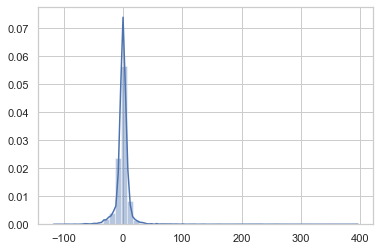

In [112]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [109]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [110]:
vif

,VIF Factor,features
0,3.716830,Nationality
1,4.034857,Club
2,4.655461,Preferred Foot
3,5.500883,Work Rate
4,8.510415,Body Type
...,...,...
75,51.056176,GKKicking
76,50.875694,GKPositioning
77,50.884356,GKReflexes
78,2.087575,Release Clause
